In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let's start by reading in one year's worth a data to get a better feel

In [2]:
#df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2015.xls', sheet_name = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'], index_col = 'Date-Fuel')

In [3]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2011.xls', sheet_name = None)

In [4]:
df.keys()

dict_keys(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'])

In [5]:
cdf = pd.concat(df,sort=False)

In [6]:
cdf

Date     Fuel          Total     00:15:00     00:30:00  \
Dec 0   2011-12-01  Biomass    1240.848016    14.407688    14.330585   
    1   2011-12-01     Coal  304483.898100  3030.512129  3018.488182   
    2   2011-12-01      Gas   16533.003190   152.205877   155.068925   
    3   2011-12-01   Gas_CC  231553.360800  1671.430668  1663.995426   
    4   2011-12-01    Hydro     670.712237     3.295767     3.354344   
...            ...      ...            ...          ...          ...   
Jan 212 2011-01-27     Wind   33215.388240    64.469158    61.570745   
    213 2011-01-28     Wind   63676.919790   902.879713   887.507136   
    214 2011-01-29     Wind  116013.696500  1432.364544  1424.886247   
    215 2011-01-30     Wind   56567.615170  1309.450582  1297.133092   
    216 2011-01-31     Wind   93839.194180   504.251592   506.157328   

            00:45:00     01:00:00     01:15:00     01:30:00     01:45:00  ...  \
Dec 0      14.373080    14.213054    14.401332    14.321940    14.372122  ...   
    1    2949.925395  2886.301390  2838.653501  2846.953067  2835.278458  ...   
    2     154.983330   151.803558   151.926684   150.517654   149.605580  ...   
    3    1638.893667  1630.241325  1573.826138  1551.574691  1523.607069  ...   
    4       3.360363     3.332641     3.739967     3.855072     4.067891  ...   
...              ...          ...          ...          ...          ...  ...   
Jan 212    61.799390    63.150979    74.495606    68.933396    63.965243  ...   
    213   878.313700   873.639622   877.622581   864.756917   865.369888  ...   
    214  1412.514295  1421.929725  1421.195225  1433.795932  1433.592426  ...   
    215  1274.535557  1198.675401  1149.821119  1132.147098  1135.781298  ...   
    216   545.779213   548.716840   554.804809   567.764735   603.959378  ...   

            00:00:00  DST1  DST2  DST3  DST4  Unnamed: 99  Unnamed: 100  \
Dec 0      14.093291   NaN   NaN   NaN   NaN          NaN           NaN   
    1    2574.513867   NaN   NaN   NaN   NaN          NaN           NaN   
    2     199.685186   NaN   NaN   NaN   NaN          NaN           NaN   
    3    1342.585970   NaN   NaN   NaN   NaN          NaN           NaN   
    4       1.891251   NaN   NaN   NaN   NaN          NaN           NaN   
...              ...   ...   ...   ...   ...          ...           ...   
Jan 212          NaN   NaN   NaN   NaN   NaN          NaN           NaN   
    213          NaN   NaN   NaN   NaN   NaN          NaN           NaN   
    214          NaN   NaN   NaN   NaN   NaN          NaN           NaN   
    215          NaN   NaN   NaN   NaN   NaN          NaN           NaN   
    216          NaN   NaN   NaN   NaN   NaN          NaN           NaN   

         Unnamed: 101  Unnamed: 102  1900-01-01 00:00:00  
Dec 0             NaN           NaN                  NaN  
    1             NaN           NaN                  NaN  
    2             NaN           NaN                  NaN  
    3             NaN           NaN                  NaN  
    4             NaN           NaN                  NaN  
...               ...           ...                  ...  
Jan 212           NaN           NaN           923.240833  
    213           NaN           NaN          1422.780711  
    214           NaN           NaN          1313.074392  
    215           NaN           NaN           518.759240  
    216           NaN           NaN          1561.376343  

[2931 rows x 108 columns]

In [9]:
full_df = cdf[['Date', 'Fuel', 'Total']]

In [10]:
full_df['Fuel'] = full_df['Fuel'].replace('Sun','Solar')

<ipython-input-10-90cca54ffcb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['Fuel'] = full_df['Fuel'].replace('Sun','Solar')


In [11]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = full_df['Date'].unique()
full_df = full_df.set_index([full_df.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()

In [12]:
full_df

Fuel,Biomass,Coal,Gas,Gas_CC,Hydro,Nuclear,Other,Solar,Wind
0,1240.848016,304483.8981,16533.003190,231553.3608,670.712237,90516.91023,357.449324,70.651290,123213.38820
1,1478.590690,320703.6726,21713.136180,247258.5138,667.009668,90462.21494,372.626928,10.255158,62531.39844
2,1483.246127,296436.2237,17138.316250,205146.6936,741.426017,90472.37075,401.536782,15.155827,89515.57352
3,1411.010006,322214.6377,15710.513050,256037.4238,683.281626,90312.68708,478.415477,5.278214,59542.48570
4,1348.331266,308136.0801,26613.057550,331388.7425,623.145421,90280.19160,440.383112,22.997359,128920.84250
...,...,...,...,...,...,...,...,...,...
360,NaN,391574.3904,14064.499100,244284.6778,930.447743,123088.31390,1816.448209,NaN,33215.38824
361,NaN,368986.9314,10505.203990,187766.2169,1057.862066,124144.20860,1775.741259,NaN,63676.91979
362,NaN,321513.3362,7767.105812,112331.5935,1109.495445,123958.13490,1629.332581,NaN,116013.69650
363,NaN,331955.2918,11506.250090,125563.5713,1249.034219,123867.69810,1591.438915,NaN,56567.61517


In [14]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
full_df['date'] = pd.date_range(start='2011-01-01', periods=len(full_df), freq='D')

In [15]:
full_df

Fuel,Biomass,Coal,Gas,Gas_CC,Hydro,Nuclear,Other,Solar,Wind,date
0,1240.848016,304483.8981,16533.003190,231553.3608,670.712237,90516.91023,357.449324,70.651290,123213.38820,2011-01-01
1,1478.590690,320703.6726,21713.136180,247258.5138,667.009668,90462.21494,372.626928,10.255158,62531.39844,2011-01-02
2,1483.246127,296436.2237,17138.316250,205146.6936,741.426017,90472.37075,401.536782,15.155827,89515.57352,2011-01-03
3,1411.010006,322214.6377,15710.513050,256037.4238,683.281626,90312.68708,478.415477,5.278214,59542.48570,2011-01-04
4,1348.331266,308136.0801,26613.057550,331388.7425,623.145421,90280.19160,440.383112,22.997359,128920.84250,2011-01-05
...,...,...,...,...,...,...,...,...,...,...
360,NaN,391574.3904,14064.499100,244284.6778,930.447743,123088.31390,1816.448209,NaN,33215.38824,2011-12-27
361,NaN,368986.9314,10505.203990,187766.2169,1057.862066,124144.20860,1775.741259,NaN,63676.91979,2011-12-28
362,NaN,321513.3362,7767.105812,112331.5935,1109.495445,123958.13490,1629.332581,NaN,116013.69650,2011-12-29
363,NaN,331955.2918,11506.250090,125563.5713,1249.034219,123867.69810,1591.438915,NaN,56567.61517,2011-12-30


In [16]:
full_df = full_df.set_index('date')


In [17]:
full_df

Fuel,Biomass,Coal,Gas,Gas_CC,Hydro,Nuclear,Other,Solar,Wind
date,,,,,,,,,
2011-01-01,1240.848016,304483.8981,16533.003190,231553.3608,670.712237,90516.91023,357.449324,70.651290,123213.38820
2011-01-02,1478.590690,320703.6726,21713.136180,247258.5138,667.009668,90462.21494,372.626928,10.255158,62531.39844
2011-01-03,1483.246127,296436.2237,17138.316250,205146.6936,741.426017,90472.37075,401.536782,15.155827,89515.57352
2011-01-04,1411.010006,322214.6377,15710.513050,256037.4238,683.281626,90312.68708,478.415477,5.278214,59542.48570
2011-01-05,1348.331266,308136.0801,26613.057550,331388.7425,623.145421,90280.19160,440.383112,22.997359,128920.84250
...,...,...,...,...,...,...,...,...,...
2011-12-27,NaN,391574.3904,14064.499100,244284.6778,930.447743,123088.31390,1816.448209,NaN,33215.38824
2011-12-28,NaN,368986.9314,10505.203990,187766.2169,1057.862066,124144.20860,1775.741259,NaN,63676.91979
2011-12-29,NaN,321513.3362,7767.105812,112331.5935,1109.495445,123958.13490,1629.332581,NaN,116013.69650


### Let's combine 'Gas' & 'Gas-CC' as one column - 'NGas' for natural gas

In [18]:
full_df['NGas'] = full_df['Gas'] + full_df['Gas_CC']
full_df.drop(columns = ['Gas', 'Gas_CC'], inplace = True)

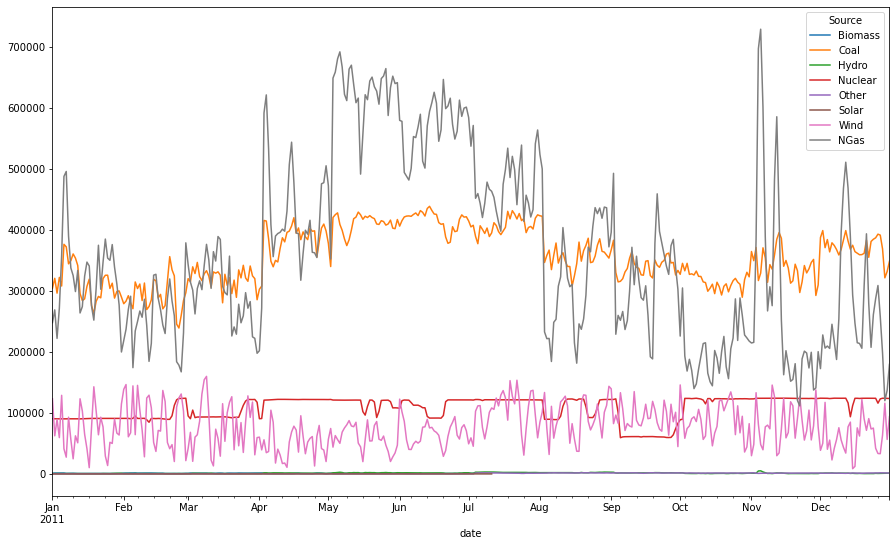

In [19]:
full_df.plot(figsize=(15,9)).legend(title='Source', bbox_to_anchor=(1, 1));


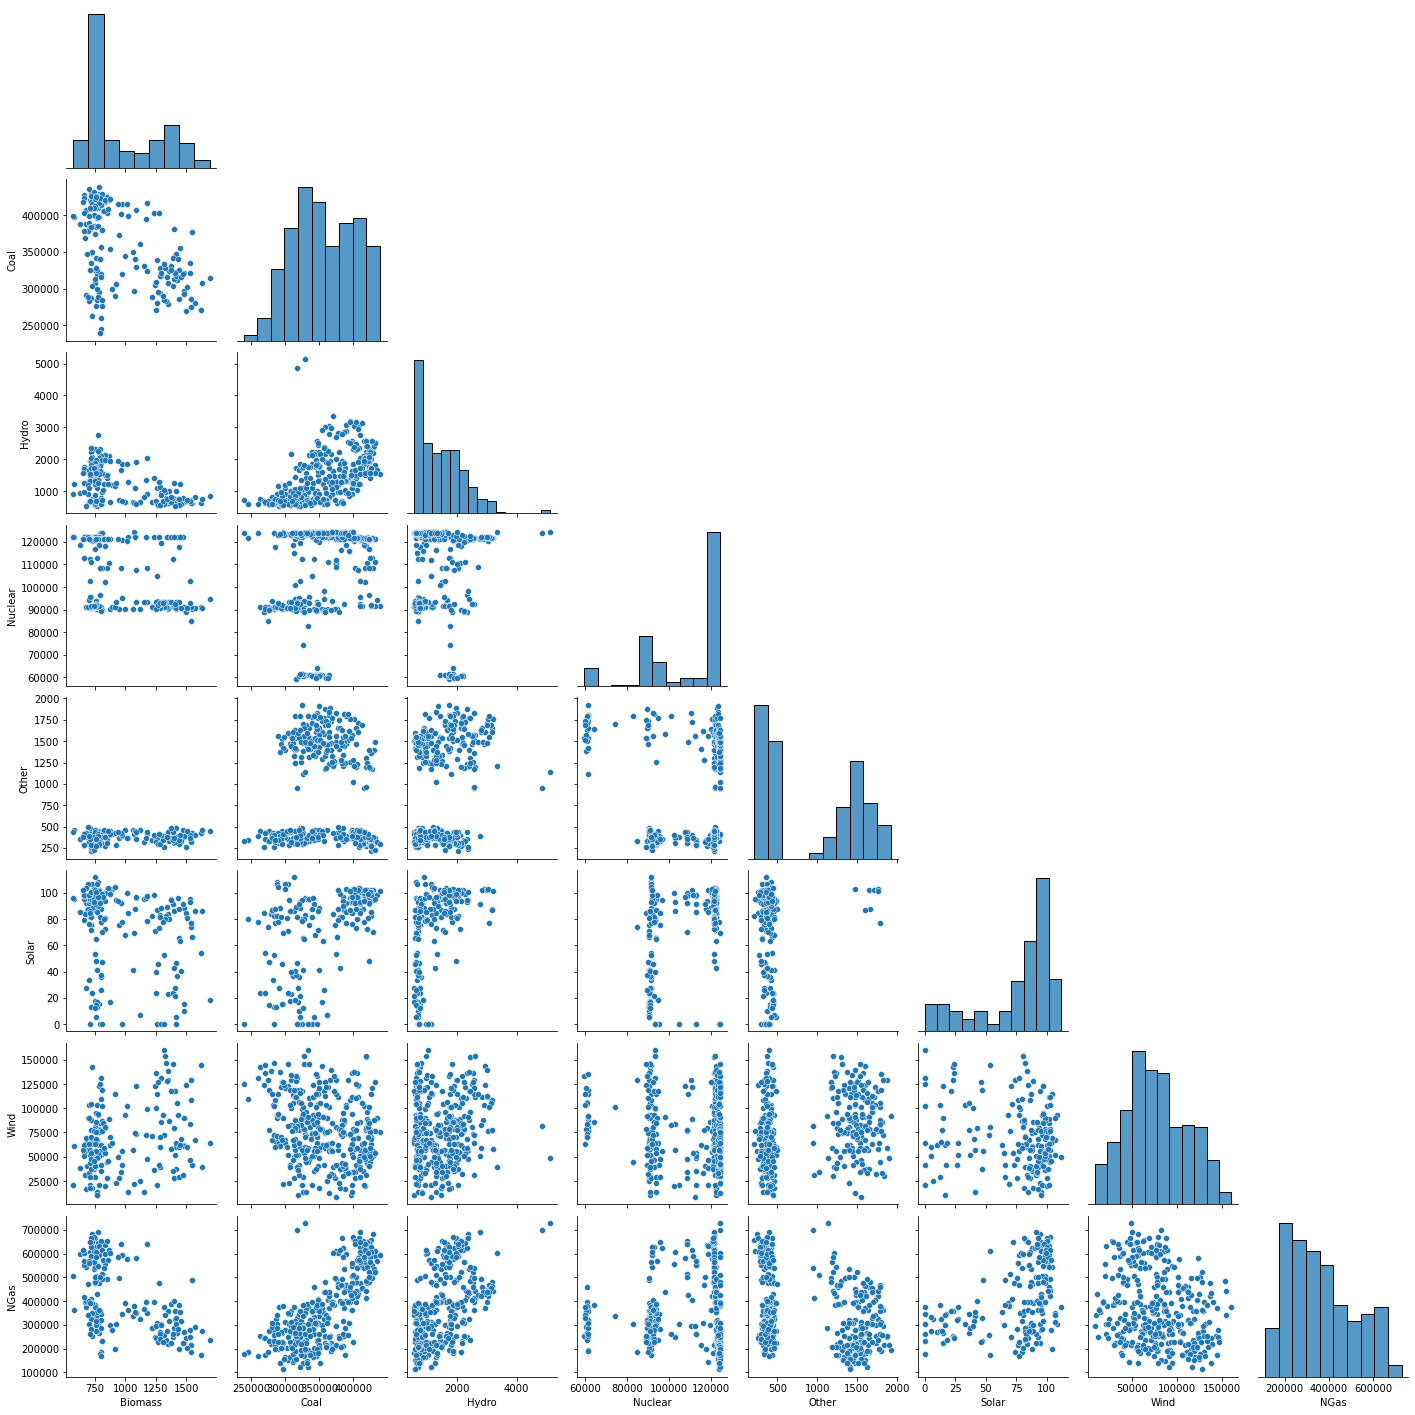

In [20]:
sns.pairplot(full_df, corner=True)

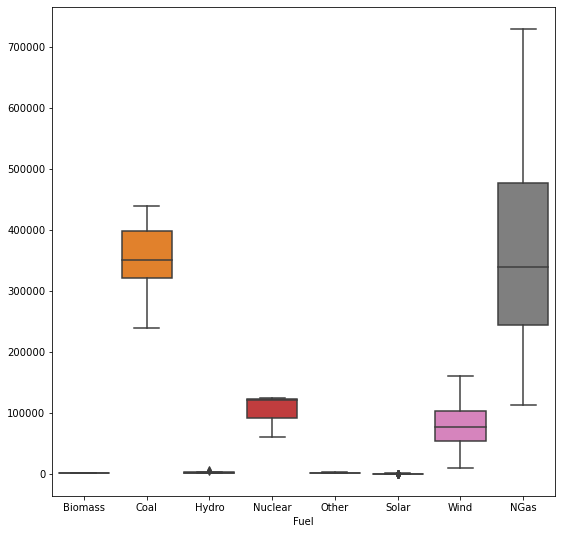

In [21]:
plt.figure(figsize=(9,9))
sns.boxplot(data = full_df,
            
            );


### Let's check the nulls

In [22]:
full_df.isnull().sum()

Fuel
Biomass    181
Coal         0
Hydro        0
Nuclear      0
Other        0
Solar      173
Wind         0
NGas         0
dtype: int64

#### Because we have so many nulls for these two sources and using the mean would lead to misleading information, let's fill with the preceeding values

In [23]:
full_df.fillna(method='ffill', inplace = True)

In [24]:
full_df.isnull().sum()

Fuel
Biomass    0
Coal       0
Hydro      0
Nuclear    0
Other      0
Solar      0
Wind       0
NGas       0
dtype: int64

### Export the cleaned data

In [25]:
full_df.to_csv('../data/final_dfs/2011_clean.csv')